Dataset was downloaded from <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Kaggle's Credit Card Fraud Detection</a>

All code adapted from the original work by <a href="https://www.linkedin.com/in/aris-davelis">Aris Davelis</a>

# Reading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/creditcard.csv')

# Correlation matrix

In [3]:
df.corr() \
    .style.background_gradient(cmap='coolwarm') \
    .format(precision = 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


# Machine learning

## Common operations

### Preparing the comparison table

In [4]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)

### Drawing the confusion matrix

In [5]:
import sklearn.metrics as metrics

def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Negative','Positive']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

### Plotting ROC

In [6]:
import sklearn.metrics as metrics

def Plot_roc_curve(y, y_prob, model_name):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(metrics.roc_auc_score(y, y_prob)))
    plt.legend(loc=4)
    plt.show()

### Displaying results

In [7]:
def print_results(model_name, y_test, y_pred, pred_prob=None, draw_roc=True):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into a dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if draw_roc:
        Plot_roc_curve(y_test,pred_prob,model_name)

### Executing a given algorithm

In [8]:
def execute_ml(model_name, model, X_train, y_train):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)
    print_results(model_name, y_test, pred,prob[:,-1])

### Cross validation

In [9]:
from sklearn.model_selection import cross_validate

def perform_cross_validation(model, X_train, y_train):
    cross_validation_result = cross_validate(model,
                                             X_train, y_train,
                                             return_train_score=True)

    return cross_validation_result

### Tweaking threshold

In [10]:
def execute_using_threshold(model, X_train, y_train, t):
    model.fit(X_train,y_train)
    prob = model.predict_proba(X_test)
    pred = [1 if prob[i][1]> t else 0 for i in range(len(prob))]
    print_results("threshold: %f" % t, y_test, pred,prob[:,-1], draw_roc=False)

## Specifying the independent and target features

In [11]:
X=df.drop("Class",axis='columns')
y=df["Class"]

## Splitting the dataset into training and testing subsets
<br>
<b>random_state</b> simply initializes the randomizer and can be any number
<br>
<b>test_size</b> and <b>train_size</b> are fractions of the whole dataset

In [12]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train ,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=12,test_size = 0.025, train_size=0.1)

## Machine learning algorithms

### Logistic regression

Logistic Regression
--------------------------------------------------------------------------
accuracy score :0.9987361325656509
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       0.71      0.42      0.53        12

    accuracy                           1.00      7121
   macro avg       0.86      0.71      0.76      7121
weighted avg       1.00      1.00      1.00      7121



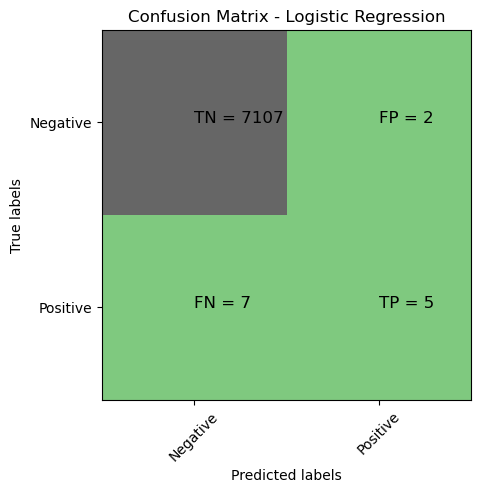

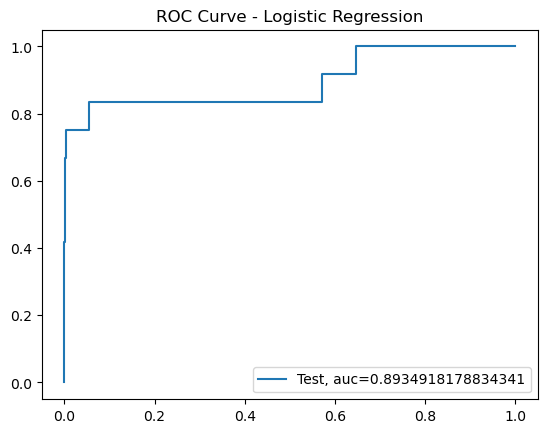

In [13]:
from sklearn.linear_model import LogisticRegression

execute_ml("Logistic Regression",
           LogisticRegression(max_iter=200,random_state=12),
           X_train, y_train) 

### Logistic regression CV

Logistic Regression CV
--------------------------------------------------------------------------
accuracy score :0.9988765622805785
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       0.75      0.50      0.60        12

    accuracy                           1.00      7121
   macro avg       0.87      0.75      0.80      7121
weighted avg       1.00      1.00      1.00      7121



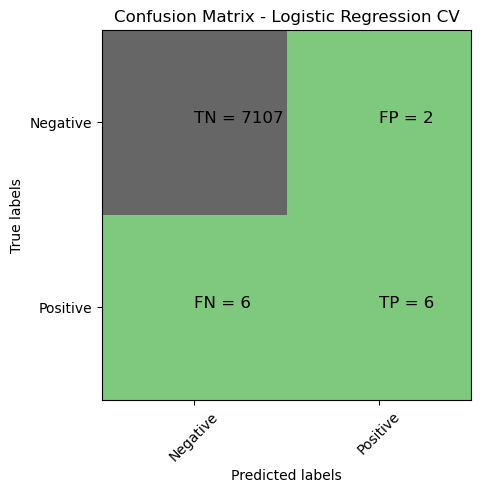

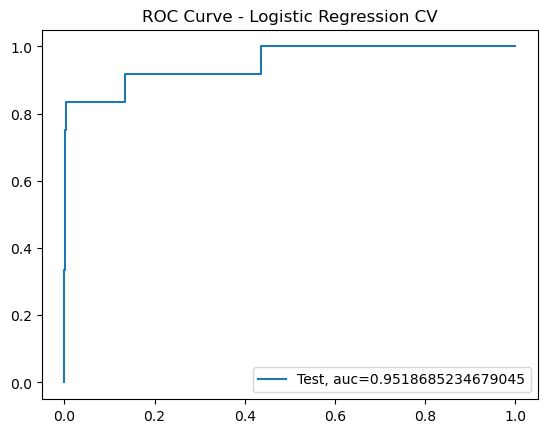

In [14]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

execute_ml("Logistic Regression CV",
           LogisticRegressionCV(max_iter=200,penalty='l2',
                                scoring='roc_auc',
                                cv=KFold(n_splits=10, shuffle=True, random_state=12),
                                tol=10,random_state=12),
           X_train, y_train)

### Bernoulli Naive Bayes

Bernoulli Naive Bayes
--------------------------------------------------------------------------
accuracy score :0.999157421710434
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       0.80      0.67      0.73        12

    accuracy                           1.00      7121
   macro avg       0.90      0.83      0.86      7121
weighted avg       1.00      1.00      1.00      7121



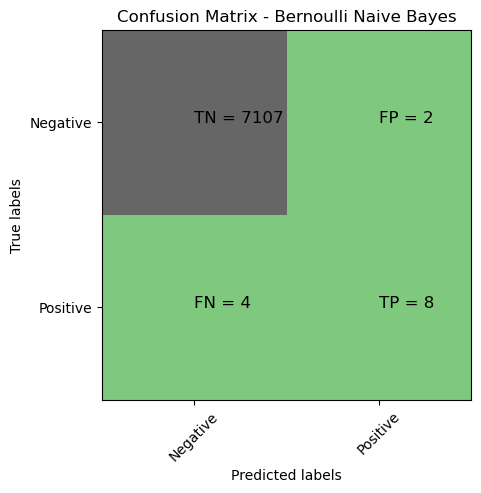

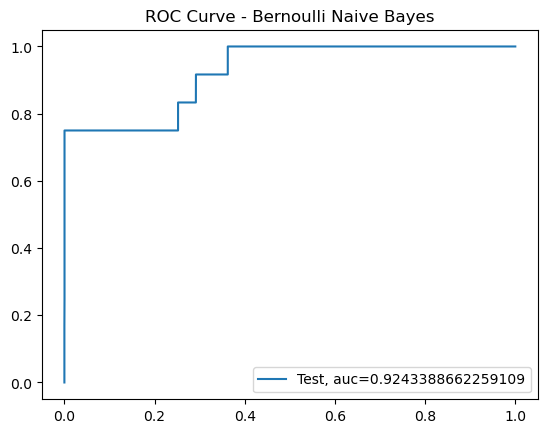

In [15]:
from sklearn.naive_bayes import BernoulliNB

execute_ml("Bernoulli Naive Bayes",
           BernoulliNB(),
           X_train, y_train)

### Random forest

#### Random forest + gini

Random Forest Classifier + gini
--------------------------------------------------------------------------
accuracy score :0.9992978514253616
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.58      0.74        12

    accuracy                           1.00      7121
   macro avg       1.00      0.79      0.87      7121
weighted avg       1.00      1.00      1.00      7121



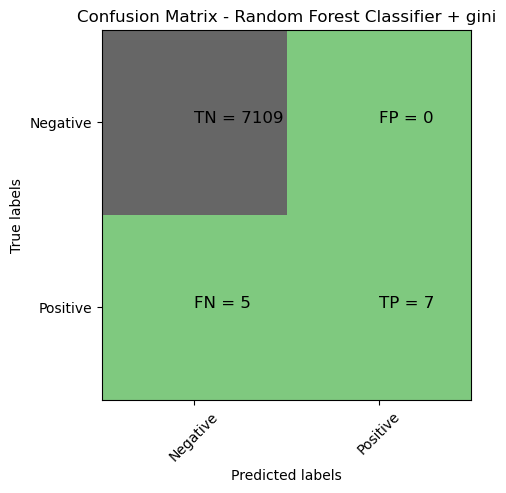

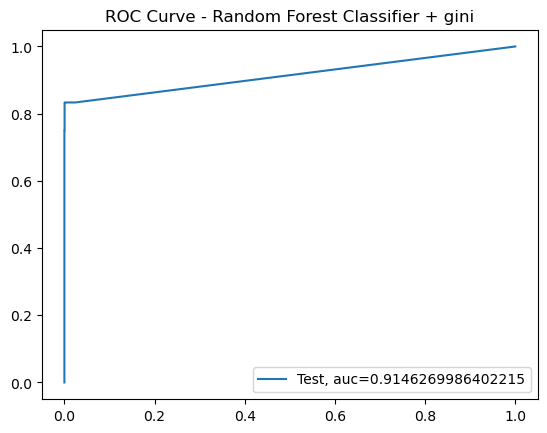

In [16]:
from sklearn.ensemble import RandomForestClassifier

execute_ml("Random Forest Classifier + gini",
           RandomForestClassifier(bootstrap = True,
                                  max_features = 'sqrt',
                                  random_state=12),
           X_train, y_train);

#### Random forest + entropy

Random Forest Classifier + entropy
--------------------------------------------------------------------------
accuracy score :0.9992978514253616
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.58      0.74        12

    accuracy                           1.00      7121
   macro avg       1.00      0.79      0.87      7121
weighted avg       1.00      1.00      1.00      7121



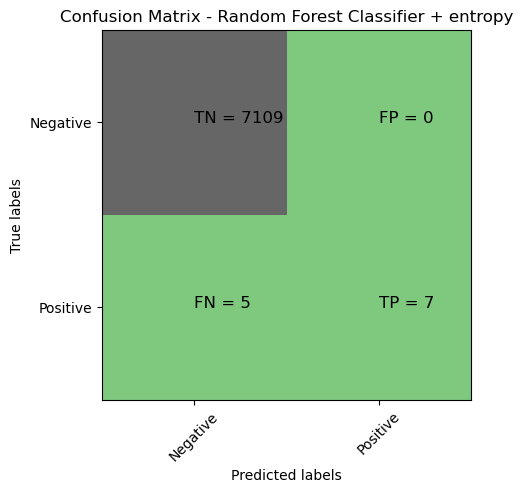

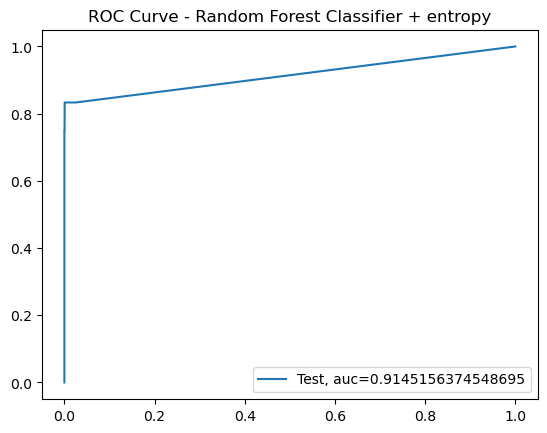

In [17]:
from sklearn.ensemble import RandomForestClassifier

execute_ml("Random Forest Classifier + entropy",
           RandomForestClassifier(bootstrap = True,
                                  criterion='entropy',
                                  max_features = 'sqrt',
                                  random_state=12),
           X_train, y_train)

### Bagging classifier

Bagging Classifier
--------------------------------------------------------------------------
accuracy score :0.9994382811402893
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.67      0.80        12

    accuracy                           1.00      7121
   macro avg       1.00      0.83      0.90      7121
weighted avg       1.00      1.00      1.00      7121



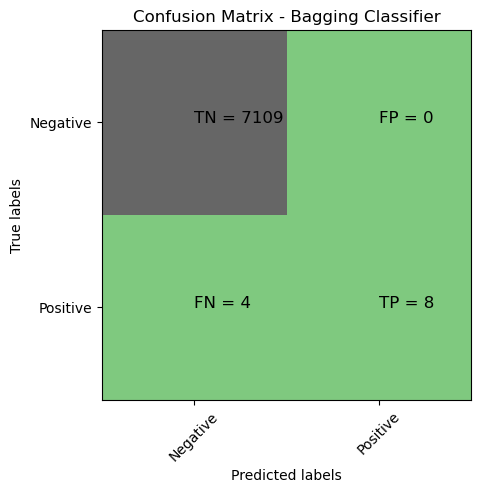

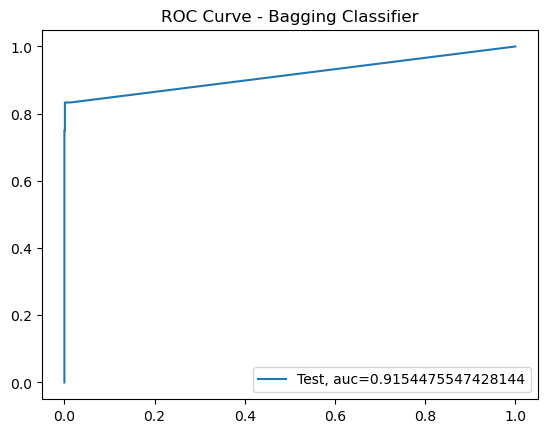

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

execute_ml("Bagging Classifier",
           BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=200,
                             max_samples=0.8,
                             max_features=0.8,
                             oob_score=True,
                             random_state=12),
           X_train, y_train)

### Gradient Boosting classifier

Gradient Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9983148434208678
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       0.00      0.00      0.00        12

    accuracy                           1.00      7121
   macro avg       0.50      0.50      0.50      7121
weighted avg       1.00      1.00      1.00      7121



C:\Users\Babak\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Babak\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Babak\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Babak\anaconda3\envs\ml\lib\site-packages\s

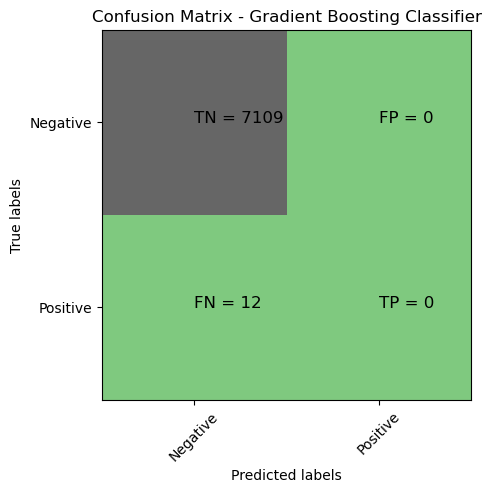

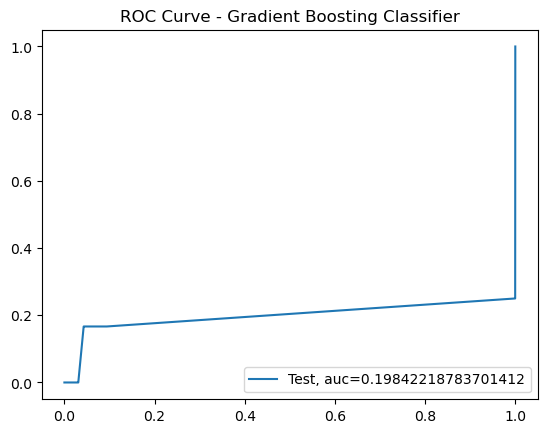

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

execute_ml("Gradient Boosting Classifier",
           GradientBoostingClassifier(),
           X_train, y_train)

### AdaBoost classifier

Ada Boost Classifier
--------------------------------------------------------------------------
accuracy score :0.9994382811402893
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.67      0.80        12

    accuracy                           1.00      7121
   macro avg       1.00      0.83      0.90      7121
weighted avg       1.00      1.00      1.00      7121



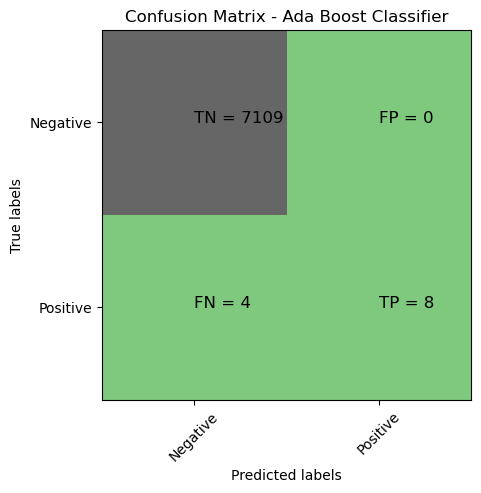

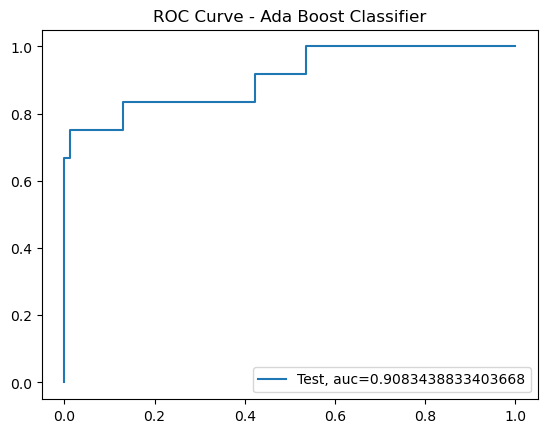

In [20]:
from sklearn.ensemble import AdaBoostClassifier

execute_ml("Ada Boost Classifier",
           AdaBoostClassifier(n_estimators=200, random_state=12),
           X_train, y_train)

### XGBoost classifier

C:\Users\Babak\anaconda3\envs\ml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Babak\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Babak\anaconda3\envs\ml\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64In

[07:29:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:29:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boosting Classifier
--------------------------------------------------------------------------
accuracy score :0.9994382811402893
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
   

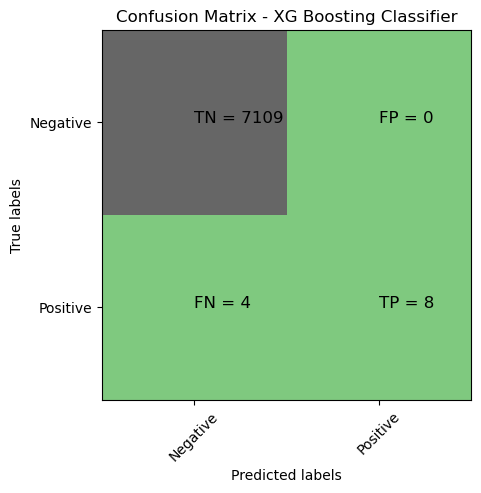

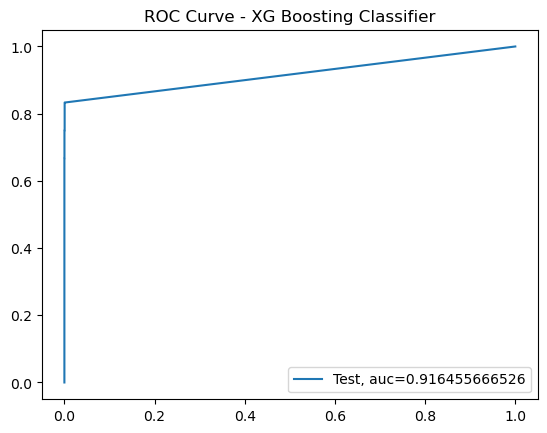

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

execute_ml("XG Boosting Classifier",
           XGBClassifier(cv=KFold(n_splits=10, random_state=12, shuffle=True),
                         learning_rate=0.01),
           X_train, y_train)

## Evaluation

In [22]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.998736,0.714286,0.416667,0.526316
1,Logistic Regression CV,0.998877,0.750000,0.500000,0.600000
2,Bernoulli Naive Bayes,0.999157,0.800000,0.666667,0.727273
3,Random Forest Classifier + gini,0.999298,1.000000,0.583333,0.736842
4,Random Forest Classifier + entropy,0.999298,1.000000,0.583333,0.736842
5,Bagging Classifier,0.999438,1.000000,0.666667,0.800000
6,Gradient Boosting Classifier,0.998315,0.000000,0.000000,0.000000
7,Ada Boost Classifier,0.999438,1.000000,0.666667,0.800000
8,XG Boosting Classifier,0.999438,1.000000,0.666667,0.800000


## Overfit analysis using cross validation

Cross validating the training VS testing performance using the selected model. If the measurements are not that far apart means that there is not a considerable overfit.

In [23]:
perform_cross_validation(
    RandomForestClassifier(bootstrap = True,
                           criterion='entropy',
                           verbose=1,
                           oob_score=True,
                           max_features = 'sqrt',
                           random_state=12),
    X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

{'fit_time': array([8.60546732, 7.08774281, 6.2056675 , 7.32260323, 8.20999265]),
 'score_time': array([0.0539999 , 0.04500604, 0.04299712, 0.05699158, 0.04500198]),
 'test_score': array([0.99877107, 0.99929775, 0.99929775, 0.99929775, 0.99929775]),
 'train_score': array([1., 1., 1., 1., 1.])}

## Threshold tweaking

Checking the performance agaist different thresholds (extracted from the ROC curve) in order to find and optimum with regards to the case study (Whether it is more important to classify Positives or Negatives)

threshold: 0.100000
--------------------------------------------------------------------------
accuracy score :0.999157421710434
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       0.75      0.75      0.75        12

    accuracy                           1.00      7121
   macro avg       0.87      0.87      0.87      7121
weighted avg       1.00      1.00      1.00      7121



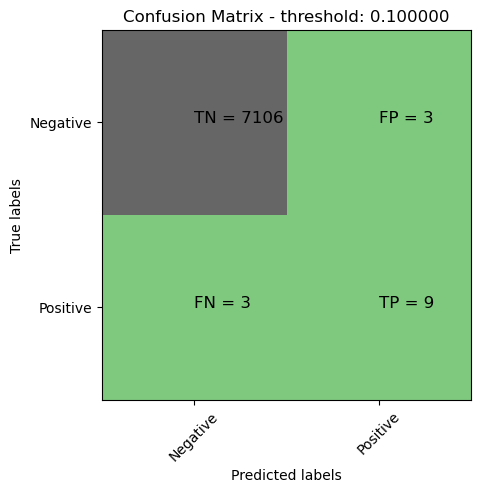

threshold: 0.300000
--------------------------------------------------------------------------
accuracy score :0.9994382811402893
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.67      0.80        12

    accuracy                           1.00      7121
   macro avg       1.00      0.83      0.90      7121
weighted avg       1.00      1.00      1.00      7121



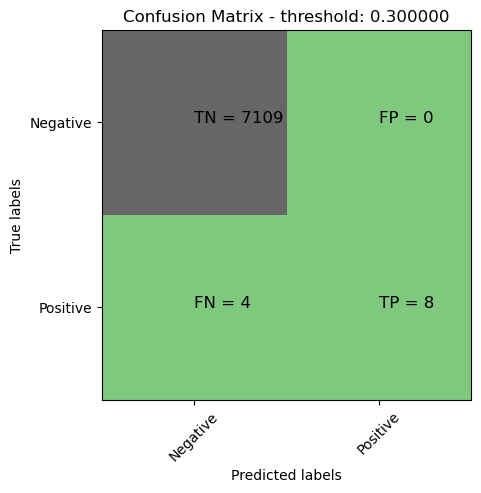

threshold: 0.500000
--------------------------------------------------------------------------
accuracy score :0.9992978514253616
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.58      0.74        12

    accuracy                           1.00      7121
   macro avg       1.00      0.79      0.87      7121
weighted avg       1.00      1.00      1.00      7121



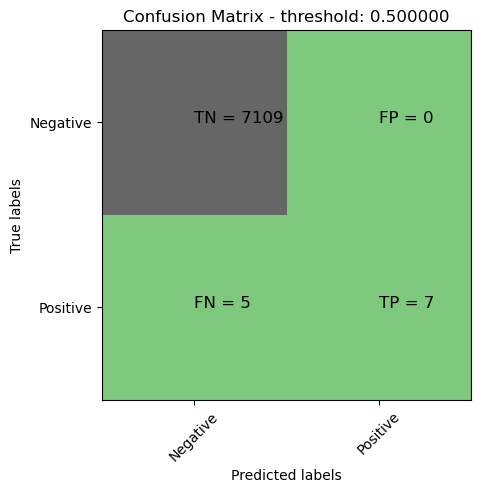

threshold: 0.700000
--------------------------------------------------------------------------
accuracy score :0.9992978514253616
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.58      0.74        12

    accuracy                           1.00      7121
   macro avg       1.00      0.79      0.87      7121
weighted avg       1.00      1.00      1.00      7121



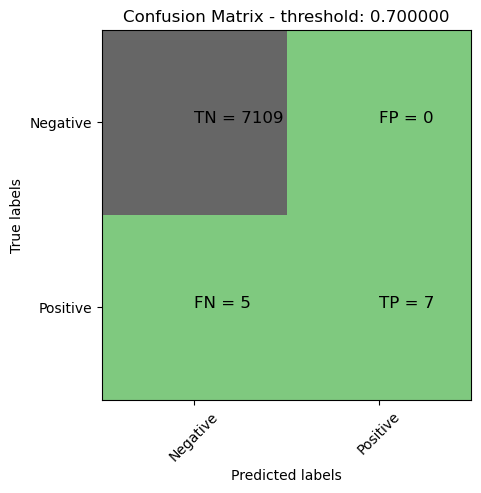

threshold: 0.900000
--------------------------------------------------------------------------
accuracy score :0.9984552731357955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7109
           1       1.00      0.08      0.15        12

    accuracy                           1.00      7121
   macro avg       1.00      0.54      0.58      7121
weighted avg       1.00      1.00      1.00      7121



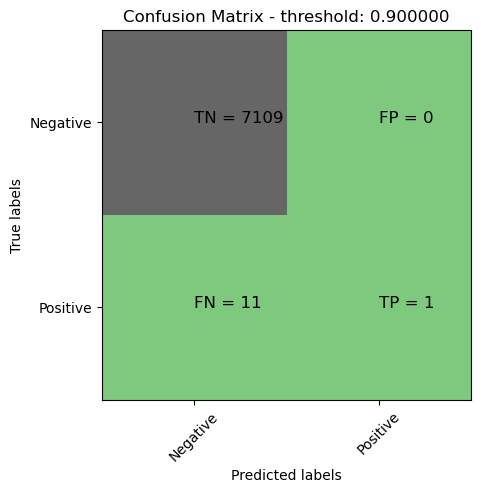

In [24]:
for i in np.arange(0.1,1,0.2):
    execute_using_threshold(
        RandomForestClassifier(bootstrap = True,
                               criterion='entropy',
                               max_features = 'sqrt',
                               random_state=12),
        X_train, y_train,
        i)